# Entender el objetivo y el dataset

**Algunos pasos utiles para la limpieza de datos**


Antes de usar algún algoritmo de aprendizaje automático o un modelo estadístico, siempre tenemos que limpiar los datos.
 Ningún modelo crea resultados significativos con datos "sucios".
La limpieza o depuración de datos es el proceso de detectar y corregir (o eliminar) registros corruptos o inexactos de un conjunto de registros, tabla o base de datos y se refiere a la identificación de partes incompletas, incorrectas, inexactas o irrelevantes de los datos y luego reemplazar, modificar o eliminar los datos sucios.

 Ciertamente esta parte no es muy divertida y requiere mucho tiempo.


Vamos a usar  el conjunto de datos de viviendas rusas de Kaggle. El objetivo de este proyecto es predecir las fluctuaciones de los precios de las viviendas en Rusia. No estamos limpiando todo el conjunto de datos, pero mostraremos ejemplos de ello.
Antes de entrar en el proceso de limpieza, echemos un breve vistazo a los datos.

[Link](https://www.kaggle.com/c/sberbank-russian-housing-market/overview/description)

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Informacion adicional

https://realpython.com/python-data-cleaning-numpy-pandas/



Leemos el fichero de fuente de datos, que previamente hemos importado al libro

In [32]:
# read the data
df = pd.read_csv('train.csv')


Comprobamos los tipos y la cantidad de instacias que tenemos

In [3]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


Comprobamos de todas las variables, que subconjunto son númericas. (Potencialmente no tenemos que cambiar nada de ellas)

In [4]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

Hacemos lo mismo con las variables que no son númericas

In [5]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


De estos resultados, aprendemos que el conjunto de datos tiene **30.471** filas y **292** columnas. También identificamos si las características son variables numéricas o categóricas. Todas ellas son información útil.
Ahora podemos revisar la lista de tipos de datos "sucios" y arreglarlos uno por uno.



**¿LA CLASE  ES UN ATRIBUTO DE ENTRADA?** 

OBVIAMENTE NO, con lo que tenemos 292 atributos, con lo que la variable *price_doc* es la variable de salida. 

**¿Nos tenemos que preocupar de los datos de test?**

Tenemos que asegurarnos que tienen las mismas variables y mismos tipos, si hemos trabajado con un dataset no propio 


In [6]:
# read the data
df2 = pd.read_csv('test.csv')
print(df2.shape)
print(df2.dtypes)


(7662, 291)
id                      int64
timestamp              object
full_sq               float64
life_sq               float64
floor                   int64
                       ...   
church_count_5000       int64
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
Length: 291, dtype: object


Estoy viendo que los datos de test, les falta un atributo ¿es correcto? Claro, porque se trata de la clase de salida, aun eso no he comprobado si todas las variables son iguales (nombre de los atributos)



# Missing values

Tratar con datos/valores perdidos es una de las partes más difíciles pero comunes de la limpieza de datos. 
Mientras que muchos modelos pueden vivir con otros problemas de los datos, la mayoría de los modelos no aceptan datos faltantes.

**¿Cómo averiguarlo?**


Cubrimos tres técnicas para aprender más sobre los datos que faltan en nuestro conjunto de datos.

## Missing Data Heatmap
Cuando hay un número menor de características, podemos visualizar los datos que faltan a través del mapa de calor.

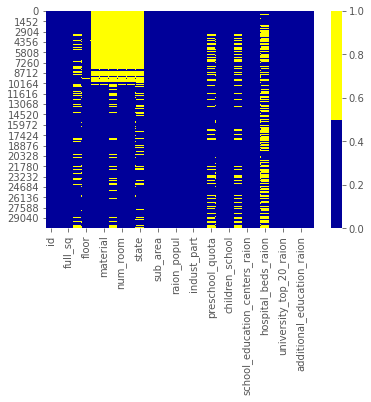

In [9]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

El gráfico que figura  muestra los patrones de datos que faltan de las primeras 30 características. 
El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color amarillo representa los datos que faltan, mientras que el color azul, en caso contrario.
Por ejemplo, vemos que la característica *life_sq* tiene valores perdidos en muchas filas. Mientras que la característica *floor* sólo tiene pequeños valores perdidos alrededor de la fila 7000.



## Missing Data Percentage List
Cuando hay muchas características en el conjunto de datos, podemos hacer una lista de los % de datos que faltan para cada característica.

Puede ser mucho más útil que el anterior cuando tienes muchas características y muchos valores

In [10]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 21%
floor - 1%
max_floor - 31%
material - 31%
build_year - 45%
num_room - 31%
kitch_sq - 31%
state - 44%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 22%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 22%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 47%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0

Esto produce una lista abajo que muestra el porcentaje de valores faltantes para cada una de las características.
Específicamente, vemos que a la característica *life_sq* le falta el 21%, mientras que  *floor* sólo le falta el 1%.
 Esta lista es un resumen útil que puede complementar la visualización del mapa de calor.

## Missing Data Histogram

El histograma de datos faltantes es también una técnica para cuando tenemos muchas características.

Para aprender más sobre los patrones de valores perdidos entre las observaciones, podemos visualizarlos mediante un histograma.

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

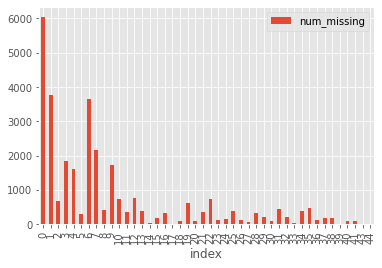

In [11]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Este histograma ayuda a identificar las situaciones de valores perdidos de las 30.471 observaciones.

Por ejemplo, hay más de 6000 instancias sin valores perdidos y cerca de 4000 instancias con un valor perdido.

# ¿Qué hacer?
No hay soluciones fijas para tratar con los datos que faltan. Tenemos que estudiar la característica específica y el conjunto de datos para decidir la mejor manera de manejarlos.

A continuación se describen los cuatro métodos más comunes para manejar los datos que faltan. Pero, si la situación es más complicada de lo habitual, tenemos que ser creativos para usar métodos más sofisticados como el modelado de datos perdidos.



##  Dejar o no dejar  la instancia

En estadística, este método se denomina técnica de supresión  ( listwise deletion technique). En esta solución, eliminamos todas la observaciones siempre y cuando contenga un valor faltante.
Sólo si estamos seguros de que los datos que faltan **no son informativos**, lo hacemos. De lo contrario, debemos considerar otras soluciones.

Podría haber otros criterios estas observaciones.
Por ejemplo, a partir del histograma de datos faltantes, notamos que sólo una cantidad mínima de observaciones tienen más de 35 características que faltan en total. Podríamos crear un nuevo conjunto de datos df_less_missing_rows eliminando las observaciones con más de 35 características que faltan.


In [12]:
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
print(df_less_missing_rows.shape)

(29779, 344)


Hemos pasado en este caso de  30.471  a 29.779 instancias para el entrenamiento

---



## Dejar o no dejar la característica

Similar a la Solución 1, sólo lo hacemos cuando estamos seguros de que esta característica no proporciona información útil.


Por ejemplo, de la lista de % de datos faltantes, notamos que hospital_beds_raion tiene un alto porcentaje de valor faltante del 47%. Podemos eliminar toda la característica.

In [13]:
# hospital_beds_raion has a lot of missing.
# If we want to drop.
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)
print(df_less_hos_beds_raion.shape)

(30471, 343)


Aqui comprobamos que tenemos las mimas instancias que al principio, porque lo único que hemos hecho es eliminar una variable de entrada.

## Imputar a los desaparecidos


Cuando el rasgo es una variable numérica, podemos llevar a cabo algún computo con los datos que faltan. 
Sustituimos los valores que faltan por el **valor medio o mediano** de los datos de la misma característica que no falta.
Cuando la característica es una variable categórica, podemos imputar los datos que faltan por el moda (el valor más frecuente).

Utilizando *life_sq* como ejemplo, podemos sustituir los valores perdidos de esta característica por su mediana.

In [14]:
# replace missing values with the median.
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.0


Esto lo hemos hecho para una variable, pero se puede aplicar la misma estrategia  para todas las características numéricas a la vez.

In [15]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)


imputing missing values for: floor
imputing missing values for: max_floor
imputing missing values for: material
imputing missing values for: build_year
imputing missing values for: num_room
imputing missing values for: kitch_sq
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing missing values for: build_count_before

Como hemos analizado el data set antes de empezar a trabajar con ello sabemos que no tenemos ninguna variable numerica con missing values

Sin embargo, podemos aplicar la estrategia de imputación de modos para todos los rasgos categóricos a la vez.


In [16]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

## Reemplazar valores

Para las características categóricas, podemos añadir una nueva categoría con un valor como "FALTA_". Para los rasgos numéricos, podemos reemplazarlo con un valor particular como -999.

De esta manera, seguimos manteniendo los valores que faltan como información valiosa.

In [17]:
# categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')


# numeric
df['life_sq'] = df['life_sq'].fillna(-999)

# Outliers (Datos fuera de rango)

Los valores atípicos son datos que son distintivamente diferentes de otras observaciones. Pueden ser verdaderos valores atípicos o errores.

**¿Cómo averiguarlo?**

Dependiendo de si la característica es numérica o categórica, podemos utilizar diferentes técnicas para estudiar su distribución para detectar los valores atípicos.


## Histograma /Box Plot

Cuando la característica es numérica, podemos usar un histograma y un diagrama de caja para detectar los valores atípicos.
A continuación se muestra el histograma del rasgo *life_sq*.



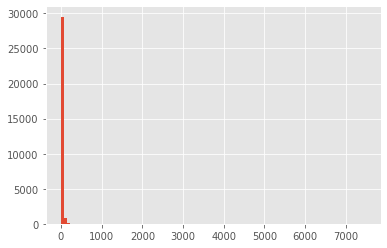

In [20]:
# histogram of life_sq.
df['life_sq'].hist(bins=100)

Los datos parecen muy sesgados con la posible existencia de valores atípicos. Estan centrados en un rango muy pequeño de valores

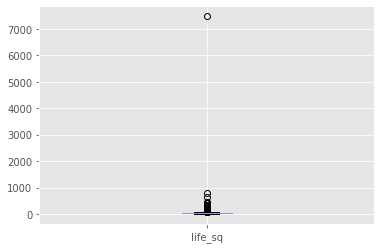

In [21]:
# box plot.
df.boxplot(column=['life_sq'])

Este último grafico, nos muestra un dato atipico con valor de más de 7000. Mientras que en el otro gráfico lo podiamos intuir.


## Bar Chart

Cuando la característica es categórica. Podemos usar un gráfico de barras para aprender sobre sus categorías y distribución.

Por ejemplo, la característica *ecology* tiene una distribución razonable. Pero si hay una categoría con un solo valor llamado "otro", entonces sería un atípico.

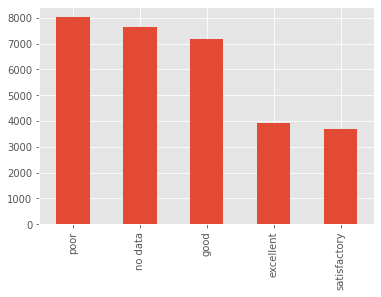

In [ ]:
# bar chart -  distribution of a categorical variable
df['ecology'].value_counts().plot.bar()

## Other Techniques

Muchas otras técnicas también pueden detectar valores atípicos, como la gráfica de dispersión, la z-score y la agrupación. 

Aunque los valores atípicos no son difíciles de detectar, tenemos que determinar las soluciones adecuadas para manejarlos. 

Depende en gran medida del conjunto de datos y del **objetivo** del proyecto.
Los métodos para manejar los valores atípicos son algo similar a los datos que faltan.
- O bien los eliminamos
- o los ajustamos 
- o los conservamos.

# Datos innecesarios

Después de todo el trabajo realizado para los datos que faltan y los valores atípicos, veamos los datos innecesarios, que son más sencillos.

Todos los datos que se introducen en el modelo deberían servir para el propósito del proyecto. 
Los datos innecesarios son cuando los datos no añaden valor. 

Hay  tres tipos principales de datos innecesarios debido a diferentes razones.

## Tipo innecesario 1: Desinformativo / Repetitivo

A veces una característica no es informativa porque tiene demasiadas filas que tienen el mismo valor.

**¿Cómo averiguarlo?**

Podemos crear una lista de características con un alto porcentaje del mismo valor.

Por ejemplo, especificamos a continuación para mostrar las características con más del 95% de filas que tienen el mismo valor.

In [22]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.35624%
0.0     29056
1.0       969
11.0      262
2.0       184
Name: build_count_foam, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosq

Podemos examinar estas variables una por una para ver si son informativas o no. 

**¿Qué hacer?**

Necesitamos entender las razones detrás de la característica repetitiva. Cuando son genuinamente desinformativas, podemos descartarlas.



## Tipo innecesario 2: Irrelevante

Una vez más, los datos deben proporcionar información valiosa para el proyecto. Si las características no están relacionadas con la cuestión que estamos tratando de resolver en el proyecto, son irrelevantes.

**¿Cómo averiguarlo?**

Necesitamos hojear las características para identificar las irrelevantes.
Por ejemplo, un rasgo que registra la *temperatura en Toronto* no proporciona ninguna información útil para predecir los precios de las *viviendas en Rusia*.

**¿Qué hacer?**

Cuando las características no sirven al objetivo del proyecto, podemos eliminarlas.

## Tipo innecesario 3: Duplicados

Los datos duplicados son cuando existen copias de la misma observación.
Hay dos tipos principales de datos duplicados.

### En base a las características

**¿Cómo averiguarlo?**

Este duplicado ocurre cuando todos los valores de las características dentro de las observaciones son los mismos. 

Es fácil de encontrar.

Primero quitamos el identificador único del conjunto de datos. Luego creamos un conjunto de datos llamado *df_dedupped* eliminando los duplicados. Comparamos las formas de los dos conjuntos de datos (df y df_dedupped) para averiguar el número de filas duplicadas.

In [23]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(30471, 344)
(30461, 343)


Tenemos 10 instancias duplicadas

### En base a un subconjunto de características

**¿Cómo averiguarlo?**

A veces es mejor eliminar los datos duplicados basándose en un conjunto de identificadores únicos.

Por ejemplo, las posibilidades de que dos transacciones ocurran al mismo tiempo, con la misma superficie, el mismo precio y el mismo año de construcción son casi nulas.
Podemos establecer un grupo de características críticas como identificadores únicos para las transacciones. Incluimos la marca de tiempo, *full_sq, life_sq, piso, build_year, num_room, price_doc*. 

Comprobamos si hay duplicados basados en ellos.

In [24]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)


timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-10-22  61       30.0     18.0   1979.0      2.0       8248500      2
2014-12-17  62       30.0     9.0    1979.0      2.0       6552000      2
2014-01-22  46       28.0     1.0    1968.0      2.0       3000000      2
2013-04-03  42       30.0     2.0    1979.0      2.0       3444000      2
2013-09-23  85       30.0     14.0   1979.0      3.0       7725974      2
2012-08-27  59       30.0     6.0    1979.0      2.0       4506800      2
2014-04-15  134      134.0    1.0    0.0         3.0       5798496      2
2013-05-22  68       30.0     2.0    1979.0      2.0       5406690      2
2013-12-05  40       30.0     5.0    1979.0      1.0       4414080      2
2012-09-05  43       30.0     21.0   1979.0      2.0       6229540      2
2015-03-30  41       41.0     11.0   2016.0      1.0       4114580      2
2013-12-18  39       30.0     6.0    1979.0      1.0       3700946      2
2013-06-24  40       30.0     12.0   1979.0

**¿Qué hacer?**

Podemos eliminar estos duplicados basándonos en las características principales. ( Si lo consideramos necesario)

In [25]:
# drop duplicates based on an subset of variables.

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 344)
(30455, 344)


Hemos eliminado 16 instancias duplicadas en función de este subconjunto de características

# Datos inconsistentes

También es crucial que el conjunto de datos siga estándares específicos para ajustarse a un modelo. 
Necesitamos explorar los datos de diferentes maneras para encontrar los datos inconsistentes. La mayor parte del tiempo, depende de las observaciones y la experiencia. No hay un código establecido para ejecutarlo y arreglarlo todo.



## 1: Capitalization

El uso inconsistente de las mayúsculas y minúsculas en los valores categóricos es un error común. Podría causar problemas ya que los análisis en Python son sensibles a las mayúsculas y minúsculas.

**¿Cómo averiguarlo?**

Veamos la característica de sub_área.

In [ ]:

df['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

Almacena el nombre de diferentes áreas y se ve muy estandarizado.

Pero a veces hay un uso inconsistente de las mayúsculas dentro de la misma característica. La "Poselenie Sosenskoe" y la "pOseleNie sosenskeo" podrían referirse a la misma área.

**¿Cómo solucionarlo?**
Para evitarlo, podemos poner todas las letras en minúsculas (o mayúsculas).




In [26]:
# make everything lower case.
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie mihajlovo-jarcevskoe       1
poselenie klenovskoe                 1
Name: sub_area_lower, Length: 146, dtype: int64

## 2: Formato

Otra estandarización que debemos realizar es la de los formatos de datos. Un ejemplo es convertir la característica de cadena al formato DateTime.

**¿Cómo averiguarlo?**

El sello de tiempo de la característica está en formato de cadena mientras que representa las fechas.

In [ ]:
df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,build_count_wood_ismissing,build_count_frame_ismissing,build_count_brick_ismissing,build_count_monolith_ismissing,build_count_panel_ismissing,build_count_foam_ismissing,build_count_slag_ismissing,build_count_mix_ismissing,raion_build_count_with_builddate_info_ismissing,build_count_before_1920_ismissing,build_count_1921-1945_ismissing,build_count_1946-1970_ismissing,build_count_1971-1995_ismissing,build_count_after_1995_ismissing,metro_min_walk_ismissing,metro_km_walk_ismissing,railroad_station_walk_km_ismissing,railroad_station_walk_min_ismissing,ID_railroad_station_walk_ismissing,cafe_sum_500_min_price_avg_ismissing,cafe_sum_500_max_price_avg_ismissing,cafe_avg_price_500_ismissing,cafe_sum_1000_min_price_avg_ismissing,cafe_sum_1000_max_price_avg_ismissing,cafe_avg_price_1000_ismissing,cafe_sum_1500_min_price_avg_ismissing,cafe_sum_1500_max_price_avg_ismissing,cafe_avg_price_1500_ismissing,cafe_sum_2000_min_price_avg_ismissing,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing,sub_area_lower
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,9,bibirevo
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6,nagatinskij zaton
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6,tekstil'shhiki
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,990.0,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7,mitino
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

**¿Qué hacer?**

Podemos convertirlo y extraer los valores de fecha u hora usando el código que se muestra a continuación. Después de esto, es más fácil analizar el grupo de volumen de transacciones por año o mes.

In [27]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

12    3400
4     3191
3     2972
11    2970
10    2736
6     2570
5     2496
9     2346
2     2275
7     1875
8     1831
1     1809
Name: month, dtype: int64


## 3: Valores categóricos

Una característica categórica tiene un número limitado de valores. A veces puede haber otros valores debido a razones como los errores tipográficos.


**¿Cómo averiguarlo?**


Necesitamos observar la característica para descubrir esta inconsistencia. 

Creamos un nuevo conjunto de datos a continuación ya que no tenemos tal problema en el conjunto de datos de bienes raíces. Por ejemplo, el valor de la ciudad fue escrito con errores como "torontoo" y "tronto". Pero ambos se refieren al valor correcto "toronto".

Una forma sencilla de identificarlos es la lógica difusa (o editar la distancia). Mide cuántas letras (distancia) necesitamos para cambiar la ortografía de un valor para que coincida con otro valor.
Sabemos que las categorías sólo deben tener cuatro valores de "toronto", "vancouver", "montreal" y "calgary". Calculamos la distancia entre todos los valores y la palabra "toronto" (y "vancouver"). Vemos que los que pueden ser errores tipográficos tienen una distancia menor con la palabra correcta. Ya que sólo se diferencian por un par de letras.


In [28]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,torontoo,1,8
1,toronto,0,8
2,tronto,1,8
3,vancouver,8,0
4,vancover,7,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


**¿Qué hacer?**

Podemos establecer criterios para convertir estos errores tipográficos a los valores correctos. Por ejemplo, el siguiente código establece que todos los valores dentro de una distancia de 2 letras de "toronto" sean "toronto".

In [29]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,1,8
3,vancouver,8,0
4,vancouver,7,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8


## 4: Direcciones

La característica de la dirección puede acarrear muchos problemas (y en general el texto libre). Porque la gente que introduce los datos en la base de datos a menudo no sigue un formato estándar.

**¿Cómo averiguarlo?**

Podemos encontrar datos de direcciones desordenados mirándolos. Aunque a veces no podemos detectar ningún problema, podemos ejecutar el código para estandarizarlos.

No hay una columna de direcciones en nuestro conjunto de datos por razones de privacidad. Así que creamos un nuevo conjunto de datos *df_add_ex* con la dirección de la característica.

In [30]:
# no address column in the housing dataset. So create one to show the code.
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


**¿Qué hacer?**

Ejecutamos el siguiente código para poner las letras en minúsculas, eliminar los espacios en blanco, eliminar los puntos y estandarizar las palabras.

In [31]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
